In [11]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import imodelsx.process_results
from collections import defaultdict
import numpy as np
import viz
import sys
sys.path.append('../experiments/')
results_dir = '/home/chansingh/mntv1/tree-prompt/jun15_subsample'

# r = imodelsx.process_results.get_results_df(results_dir)
# experiment_filename = '../experiments/01_fit.py'
# r = imodelsx.process_results.fill_missing_args_with_default(r, experiment_filename)
# # r['mean_llm_calls'] = notebook_helper.add_mean_llm_calls(r)
# r = r[r.model_name != 'manual_rf']
# r = r[r.checkpoint == 'gpt2']
# r = r[r.model_name != 'manual_tree']
# r.to_pickle('../results/subsample_results.pkl')

r = pd.read_pickle('../results/subsample_results.pkl')
ravg = r[r.seed == 1]
# ravg = imodelsx.process_results.average_over_seeds(r, experiment_filename='../experiments/01_fit.py')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# group_keys = [
#     k
#     for k in imodelsx.process_results.get_main_args_list('../experiments/01_fit.py')
#     if not k == 'seed'
#     and k in r.columns
# ]
# r.groupby(group_keys).describe()

### Curves

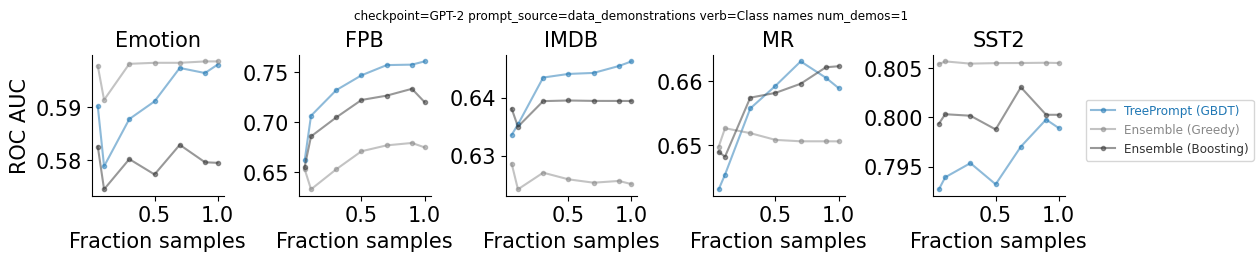

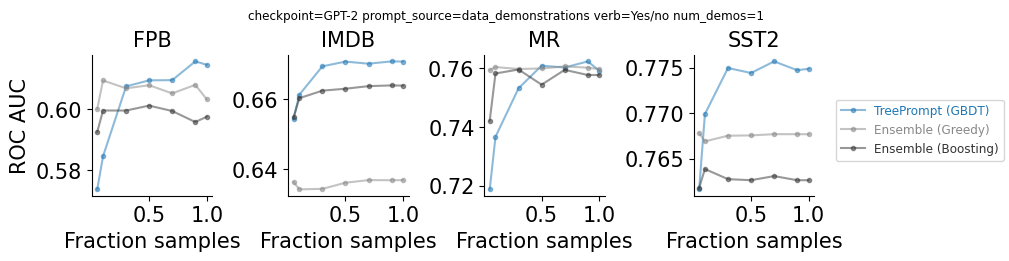

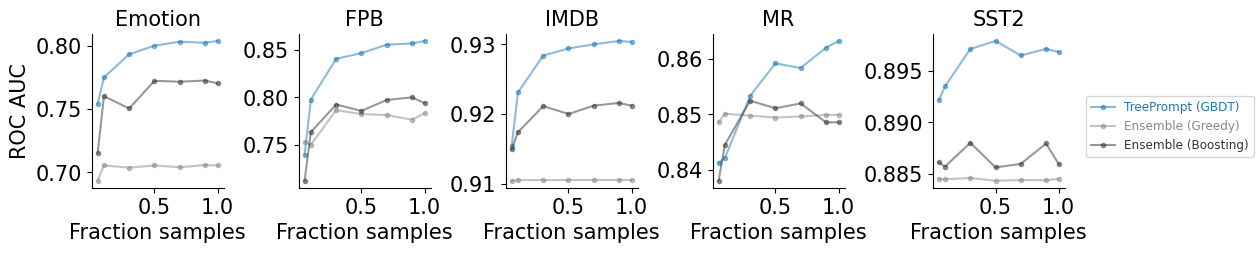

In [17]:
groupings = ['checkpoint', 'prompt_source', 'verbalizer_num']
for k, rcurve in ravg.groupby(groupings):
    rcurve = rcurve.sort_values(by=['dataset_name', 'model_name', 'subsample_frac'])
    # display(rcurve)
    metric = 'roc_auc_test'
    # metric = 'accuracy'
    x = 'subsample_frac'

    viz.plot_perf_curves_individual(rcurve, x=x, metric=metric, special_hlines=False)
    x = rcurve.iloc[0]
    plt.suptitle(f'''checkpoint={viz.CHECKPOINTS_RENAME_DICT[x.checkpoint]} prompt_source={x.prompt_source} verb={viz.VERBS_RENAME_DICT[x.verbalizer_num]} num_demos={x.num_data_demonstrations_per_class}''', fontsize='xx-small')
    # plt.tight_layout()
    # plt.show()

    # save a couple
    row = rcurve.iloc[0]
    if row.checkpoint == 'gpt2' and row.prompt_source == 'manual' and row.verbalizer_num == 0:
        # plt.suptitle(f'Model: {viz.CHECKPOINTS_RENAME_DICT[x.checkpoint]}, Prompts: {viz.SOURCE_RENAME_DICT.get(x.prompt_source, x.prompt_source)}', fontsize='x-small')
        plt.suptitle('')
        plt.savefig('../results/figs/data_efficiency_curves_gpt2.pdf', bbox_inches='tight')

# viz.save_figs_to_single_pdf("all_results.pdf")